In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [ ]:
# Import libraries for data analysis and visualization
import pandas as pd         # Data manipulation
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical data visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data(file_path):
  file_path = '/content/drive/My Drive/linkdein job posting/postings.csv'
  df = pd.read_csv(file_path)
  return df


In [ ]:
df = load_data('/content/drive/My Drive/linkdein job posting/postings.csv')
print(df.head(20))

       job_id                             company_name  \
0      921716                    Corcoran Sawyer Smith   
1     1829192                                      NaN   
2    10998357                   The National Exemplar    
3    23221523                   Abrams Fensterman, LLP   
4    35982263                                      NaN   
5    91700727                Downtown Raleigh Alliance   
6   103254301                               Raw Cereal   
7   112576855                                      NaN   
8     1218575                      Children's Nebraska   
9     2264355                          Bay West Church   
10    9615617                         Glastender, Inc.   
11   11009123                        PGAV Destinations   
12   56482768                                      NaN   
13   56924323                                      NaN   
14   69333422                          Staffing Theory   
15   83789755                              OsteoStrong   
16   95428182 

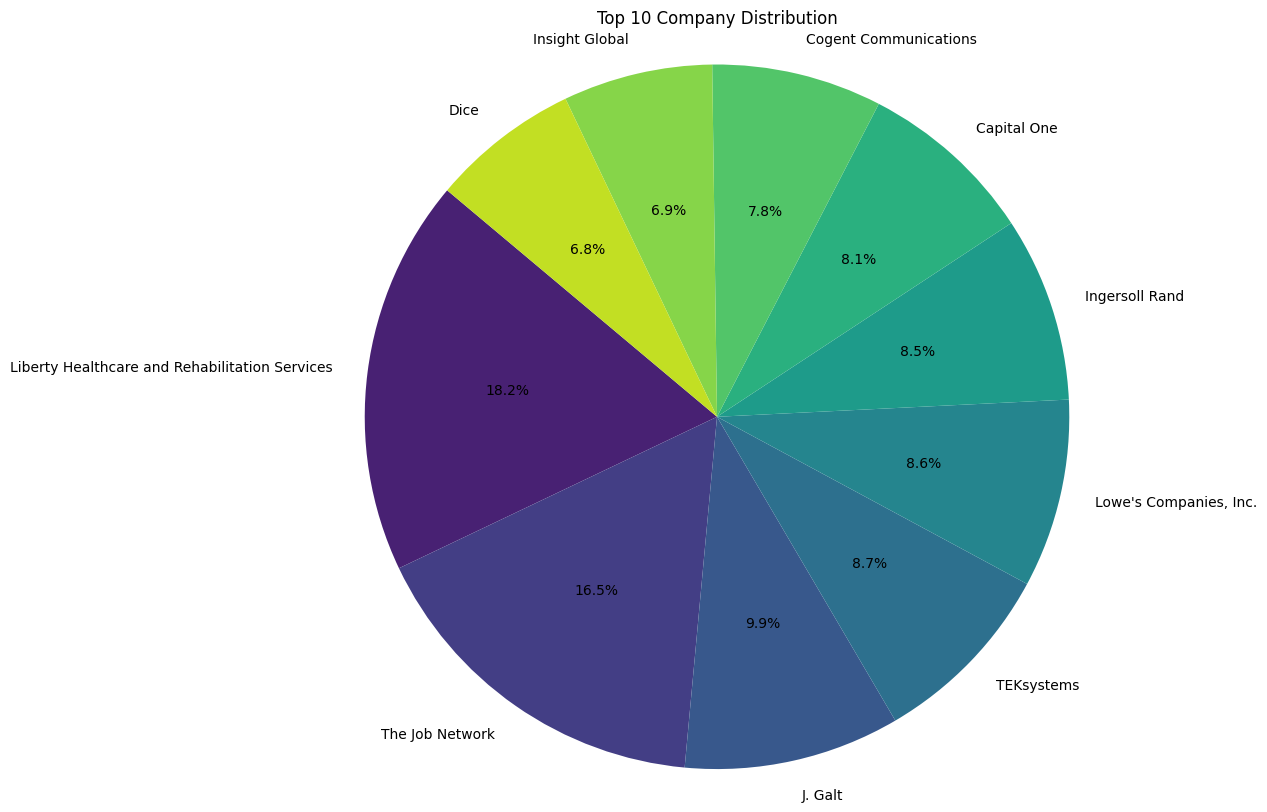

In [ ]:
# Visualize the top 10 companies using a pie chart
if 'company_name' in df.columns:
    top_10_companies = df['company_name'].value_counts().nlargest(10)

    plt.figure(figsize=(10, 10))
    plt.pie(top_10_companies, labels=top_10_companies.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_10_companies)))
    plt.title('Top 10 Company Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("'company_name' column not found.")


Analyzing Relationship between Views and Applications:


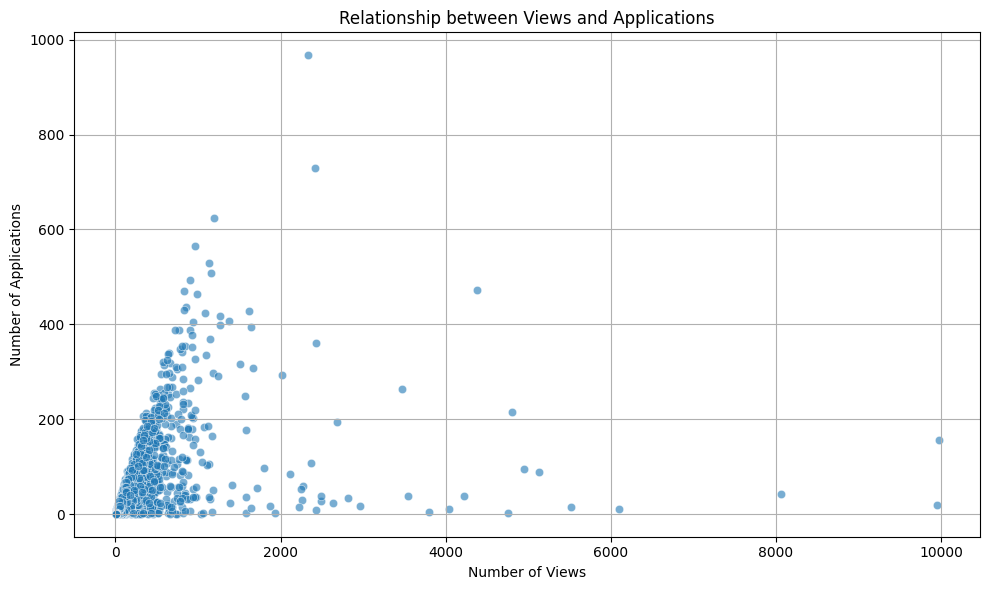

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the relationship between number of views and number of applications
print("\nAnalyzing Relationship between Views and Applications:")
if 'views' in df.columns and 'applies' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='views', y='applies', alpha=0.6)
    plt.title('Relationship between Views and Applications')
    plt.xlabel('Number of Views')
    plt.ylabel('Number of Applications')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('views' or 'applies') not found for this analysis.")

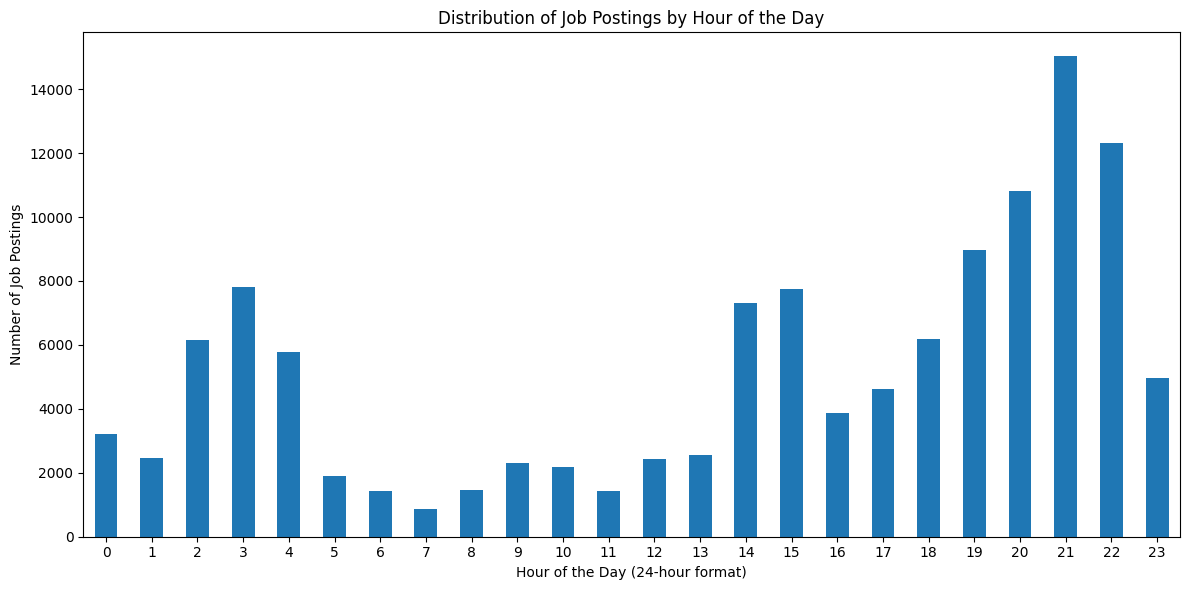

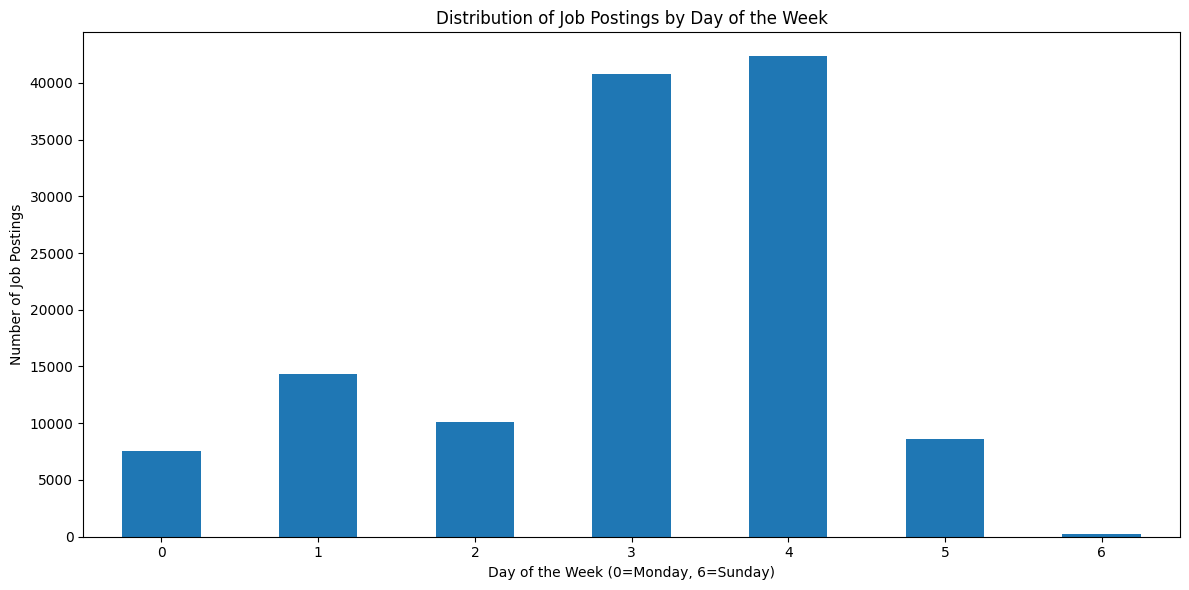

In [ ]:
# Convert 'listed_time' to datetime and extract hour and day of the week
df['listed_time'] = pd.to_datetime(df['listed_time'], unit='ms')
df['listed_hour'] = df['listed_time'].dt.hour
df['listed_day_of_week'] = df['listed_time'].dt.dayofweek

# Analyze and visualize by hour
hourly_counts = df.groupby('listed_hour').size()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar')
plt.title('Distribution of Job Postings by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Analyze and visualize by day
daily_counts = df.groupby('listed_day_of_week').size()
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar')
plt.title('Distribution of Job Postings by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

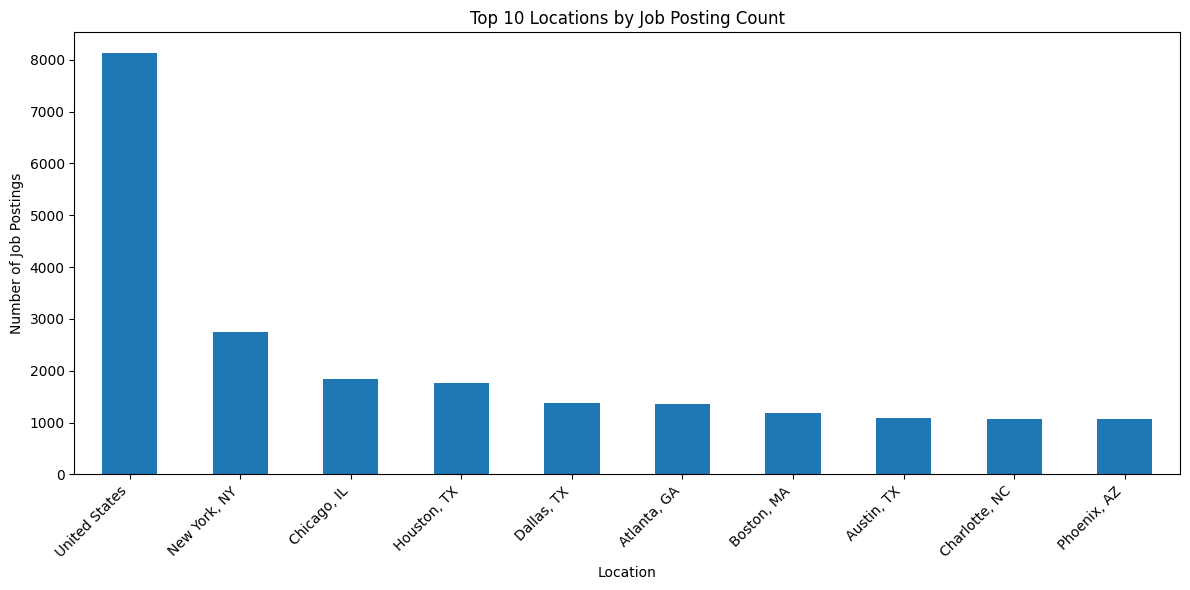

In [ ]:
# Visualize the top locations using a bar plot
if 'location' in df.columns:
    location_counts = df['location'].value_counts()
    plt.figure(figsize=(12, 6))
    location_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Locations by Job Posting Count')
    plt.xlabel('Location')
    plt.ylabel('Number of Job Postings')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("'location' column not found.")

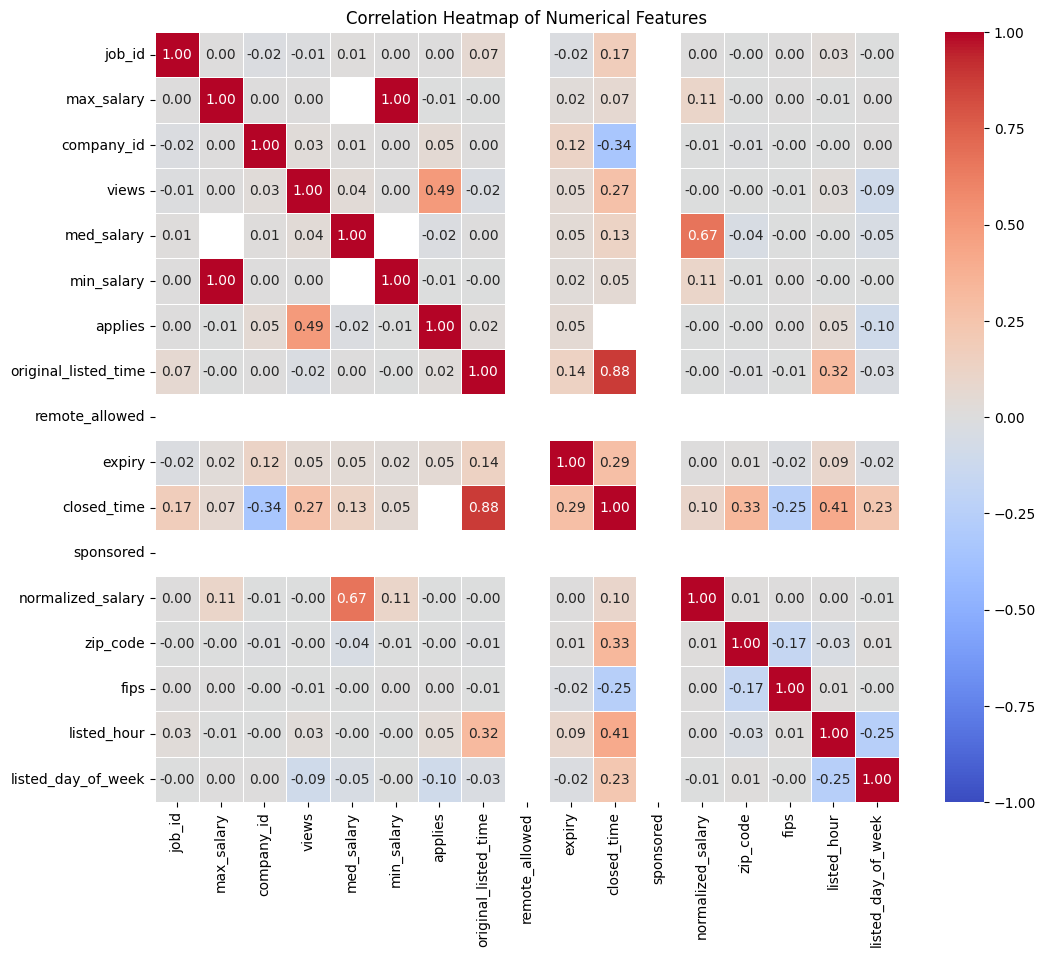

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5 ,vmin=-1 , vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Training Random Forest Model...
Random Forest Training Accuracy: 0.9984
Random Forest Validation Accuracy: 0.8941
Random Forest Classification Report:
               precision    recall  f1-score   support

    CONTRACT       0.86      0.61      0.72      2391
   FULL_TIME       0.90      0.98      0.94     19510
  INTERNSHIP       0.84      0.30      0.44       191
       OTHER       0.93      0.59      0.72        90
   PART_TIME       0.84      0.52      0.64      1898
   TEMPORARY       0.83      0.44      0.58       235
   VOLUNTEER       0.99      0.84      0.91       111

    accuracy                           0.89     24426
   macro avg       0.88      0.61      0.71     24426
weighted avg       0.89      0.89      0.88     24426

Random Forest Confusion Matrix:
 [[ 1469   920     0     0     2     0     0]
 [  219 19076     7     3   184    21     0]
 [    0   131    57     0     2     0     1]
 [    0    37     0    53     0     0     0]
 [    9   896     4     1   988     0 

/tmp/ipython-input-3346175040.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


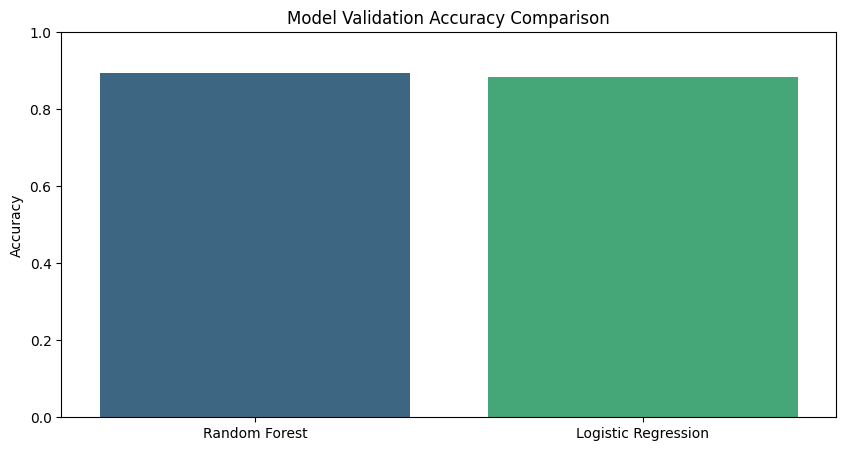

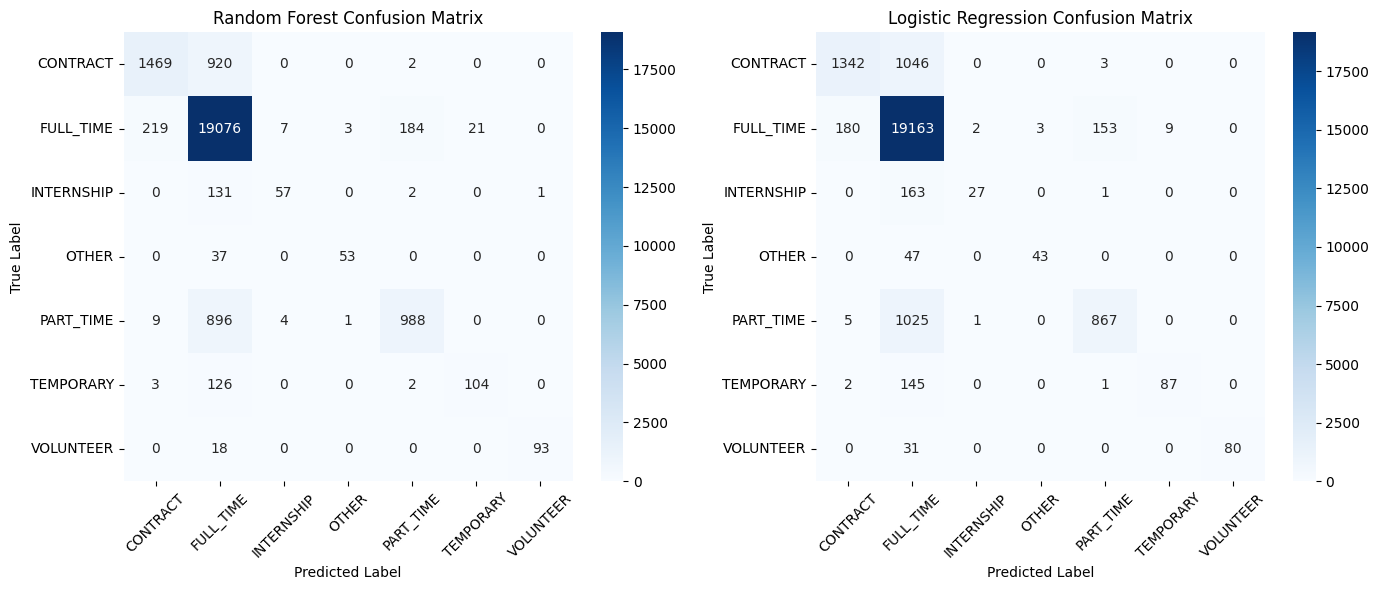

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# For predict 'work_type' based on other features.
features = ['location', 'company_name', 'title']
target = 'work_type'

# Drop rows where any of the selected features or target are missing
df_model = df[features + [target]].dropna().copy()

# Encode categorical features
categorical_features = ['location', 'company_name', 'title']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)],
    remainder='passthrough') # Keep other columns if any

# Encode the target variable
le = LabelEncoder()
df_model[target] = le.fit_transform(df_model[target])

# Split data into training and testing sets
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Stratify for balanced classes

# --- Model Training with Epochs and Accuracy Tracking ---

n_epochs = 50 # Define the number of epochs

# Random Forest with Epochs
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
print("Training Random Forest Model...")
rf_pipeline.fit(X_train, y_train)

rf_train_accuracy = rf_pipeline.score(X_train, y_train)
rf_val_accuracy = rf_pipeline.score(X_test, y_test)

# Generate predictions for confusion matrix
rf_pred = rf_pipeline.predict(X_test)

print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Validation Accuracy: {rf_val_accuracy:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred, target_names=le.classes_))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


print("\nTraining Logistic Regression Model...")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

lr_pipeline.fit(X_train, y_train)

lr_train_accuracy = lr_pipeline.score(X_train, y_train)
lr_val_accuracy = lr_pipeline.score(X_test, y_test)

# Generate predictions for confusion matrix
lr_pred = lr_pipeline.predict(X_test)


print(f"Logistic Regression Training Accuracy: {lr_train_accuracy:.4f}")
print(f"Logistic Regression Validation Accuracy: {lr_val_accuracy:.4f}")
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred, target_names=le.classes_))

# --- Debugging: Print shapes and types ---
print("\n--- Debugging Info ---")
print(f"Shape of y_test: {y_test.shape}")
print(f"Type of y_test: {type(y_test)}")
print(f"Shape of rf_pred: {rf_pred.shape}")
print(f"Type of rf_pred: {type(rf_pred)}")
print(f"Shape of lr_pred: {lr_pred.shape}")
print(f"Type of lr_pred: {type(lr_pred)}")
print("--------------------")


print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))


# --- Plotting Accuracies ---
# Since we are not training with explicit epochs for these models in this manner,
# we will plot the single final accuracy for comparison.
models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_val_accuracy, lr_val_accuracy] # Using validation accuracy for comparison

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.title('Model Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Plot Confusion Matrices with better labels
fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Increased figure width

# Get the class labels
class_labels = le.classes_

# Plot for Random Forest
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_labels, yticklabels=class_labels)
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
axes[0].tick_params(axis='y', rotation=0)  # Keep y-axis labels horizontal

# Plot for Logistic Regression
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=class_labels, yticklabels=class_labels)
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
axes[1].tick_params(axis='y', rotation=0)  # Keep y-axis labels horizontal


plt.tight_layout()
plt.show()